In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# for DT
DT_RFNE_Euler = np.load("test_results/DT_RFNE_Euler.npy")
DT_MSE_Euler = np.load("test_results/DT_MSE_Euler.npy")
DT_MAE_Euler = np.load("test_results/DT_MAE_Euler.npy")
DT_RFNE_RK4 = np.load("test_results/DT_RFNE_RK4.npy")
DT_MSE_RK4 = np.load("test_results/DT_MSE_RK4.npy")
DT_MAE_RK4 = np.load("test_results/DT_MAE_RK4.npy")
DT_RFNE_convL = np.load("test_results/DT_RFNE_convL.npy")
DT_MSE_convL = np.load("test_results/DT_MSE_convL.npy")
DT_MAE_convL = np.load("test_results/DT_MAE_convL.npy")
DT_RFNE_trilinear = np.load("test_results/DT_RFNE_trilinear.npy")
DT_MSE_trilinear = np.load("test_results/DT_MSE_trilinear.npy")
DT_MAE_trilinear = np.load("test_results/DT_MAE_trilinear.npy")
print(DT_RFNE_Euler.shape)
print(DT_MAE_RK4.shape)
print(DT_RFNE_trilinear.shape)
print(DT_RFNE_convL.shape)
# Formatting for channel-wise means
DT_RFNE = {"Euler": DT_RFNE_Euler, "RK4": DT_RFNE_RK4, "convL": DT_RFNE_convL.transpose(0,2,1), "trilinear": DT_RFNE_trilinear.transpose(0,2,1)}
DT_MSE = {"Euler": DT_MSE_Euler, "RK4": DT_MSE_RK4, "convL": DT_MSE_convL.transpose(0,2,1), "trilinear": DT_MSE_trilinear.transpose(0,2,1)}
DT_MAE = {"Euler": DT_MAE_Euler, "RK4": DT_MAE_RK4, "convL": DT_MAE_convL.transpose(0,2,1), "trilinear": DT_MAE_trilinear.transpose(0,2,1)}

def format_means(arr):
    means = arr.mean(axis=(1,0))
    return ', '.join([f"{val:.4f}" for val in means])

# Formatting for overall mean
def format_scalar(arr):
    return f"{arr.mean():.4f}", f"{arr.mean(axis=(0,-1)).std():.4f}"

method = ["Euler", "RK4", "convL", "trilinear"]
for name in method:
    print(f"DT RFNE channel wise mean ({name}): [{format_means(DT_RFNE[name])}]")
for name in method:
    print(f"DT MAE channel wise mean ({name}): [{format_means(DT_MAE[name])}]")
for name in method:
    print(f"DT RFNE mean ({name}): {format_scalar(DT_RFNE[name])[0]} +/- {format_scalar(DT_RFNE[name])[1]}")
for name in method:
    print(f"DT MAE mean ({name}): {format_scalar(DT_MAE[name])[0]} +/- {format_scalar(DT_MAE[name])[1]}")

(24, 21, 3)
(24, 21, 3)
(24, 3, 21)
(24, 3, 21)
DT RFNE channel wise mean (Euler): [0.1138, 0.0574, 0.0618]
DT RFNE channel wise mean (RK4): [0.1133, 0.0545, 0.0661]
DT RFNE channel wise mean (convL): [0.1482, 0.0276, 0.0286]
DT RFNE channel wise mean (trilinear): [0.4273, 0.0740, 0.0724]
DT MAE channel wise mean (Euler): [0.0697, 0.0184, 0.0167]
DT MAE channel wise mean (RK4): [0.0705, 0.0176, 0.0177]
DT MAE channel wise mean (convL): [0.1195, 0.0087, 0.0095]
DT MAE channel wise mean (trilinear): [0.3647, 0.0240, 0.0250]
DT RFNE mean (Euler): 0.0777 +/- 0.0453
DT RFNE mean (RK4): 0.0780 +/- 0.0454
DT RFNE mean (convL): 0.0681 +/- 0.0390
DT RFNE mean (trilinear): 0.1912 +/- 0.0640
DT MAE mean (Euler): 0.0349 +/- 0.0186
DT MAE mean (RK4): 0.0353 +/- 0.0187
DT MAE mean (convL): 0.0459 +/- 0.0261
DT MAE mean (trilinear): 0.1379 +/- 0.0531


Text(0.5, 0.98, 'DT: Averaged in time')

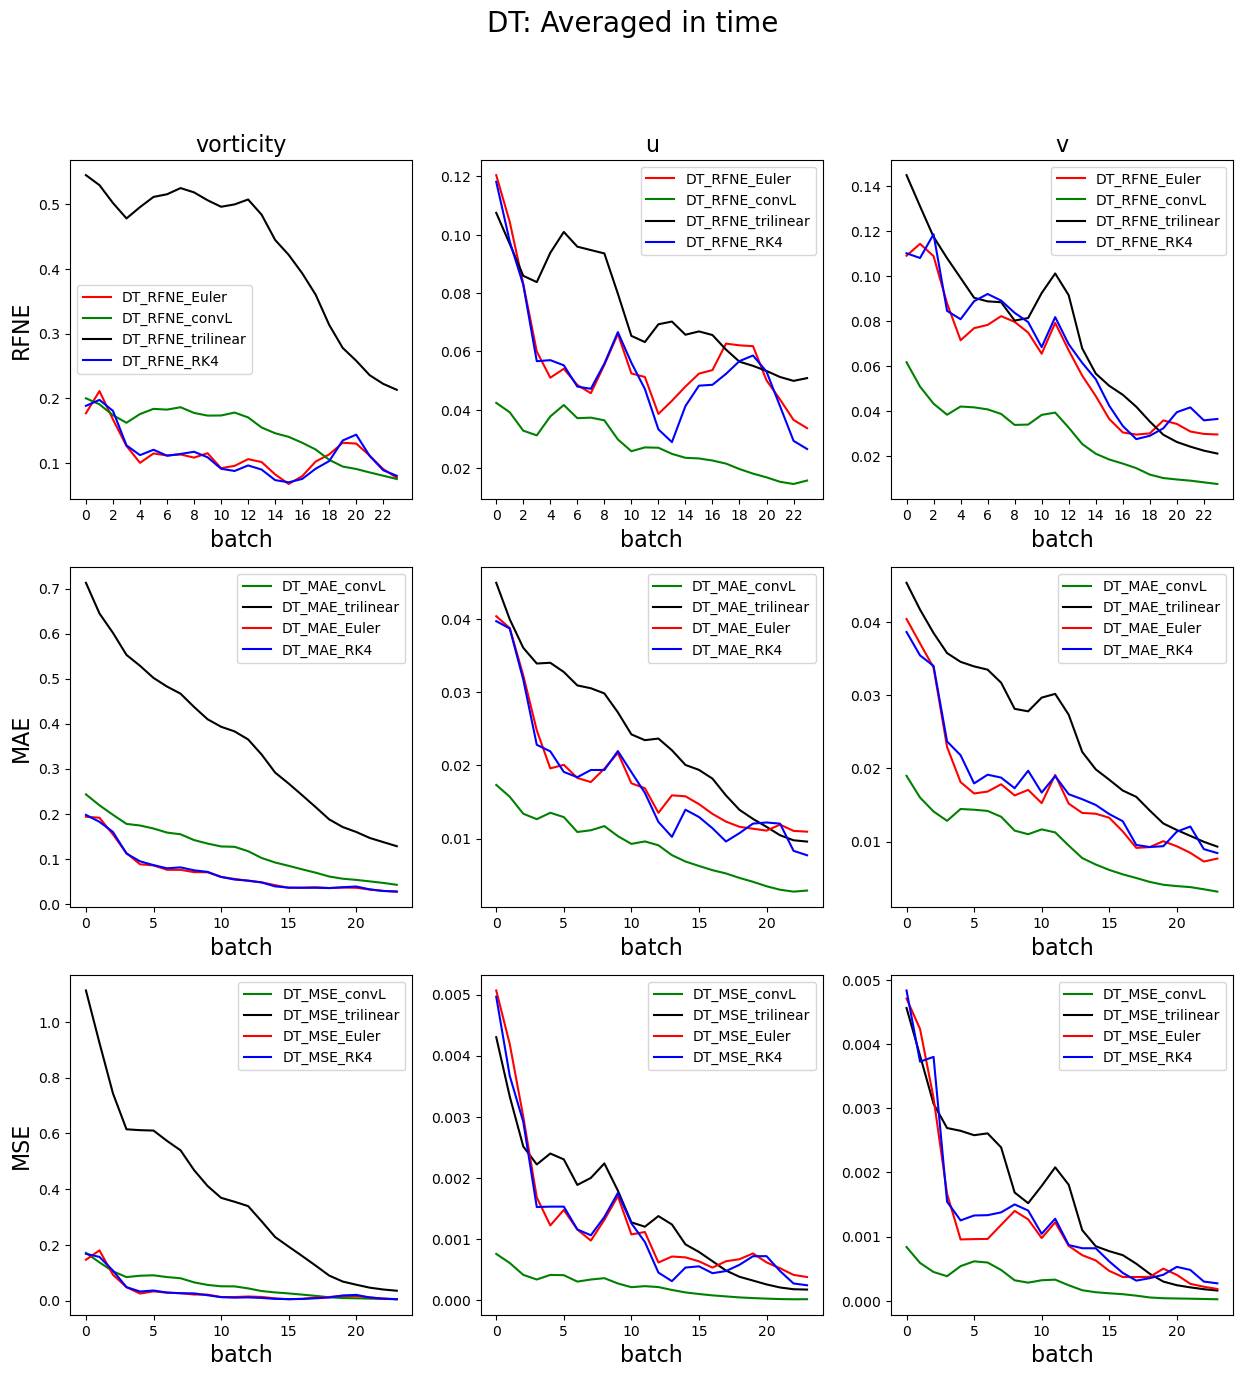

In [116]:
# compair accross batch 
fig, ax = plt.subplots(3,3,figsize=(15,15))
col_name = ["vorticity",'u','v']
row_name = ["RFNE","MAE","MSE"]
for i in range (3):
    ax[0,i].plot(DT_RFNE_Euler[...,i].mean(axis=1), label="DT_RFNE_Euler",color = 'r')
    ax[0,i].plot(DT_RFNE_convL[:,i,:].mean(axis=1), label="DT_RFNE_convL",color = 'g')
    ax[0,i].plot(DT_RFNE_trilinear[:,i,:].mean(axis=1), label="DT_RFNE_trilinear",color = 'k')
    ax[0,i].plot(DT_RFNE_RK4[...,i].mean(axis=1), label="DT_RFNE_RK4",color = 'b')
    ax[0,i].legend()
    ax[0,i].set_title(col_name[i],fontsize=16)
    ax[0,i].set_xlabel("batch",fontsize=16)
    ax[0,i].set_xticks(np.arange(0,24,2))
    ax[0,0].set_ylabel("RFNE",fontsize=16)
    ax[1,i].plot(DT_MAE_convL[:,i,:].mean(axis=1), label="DT_MAE_convL",color = 'g')
    ax[1,i].plot(DT_MAE_trilinear[:,i,:].mean(axis=1), label="DT_MAE_trilinear",color = 'k')
    ax[1,i].plot(DT_MAE_Euler[...,i].mean(axis=1), label="DT_MAE_Euler",color = 'r')
    ax[1,i].plot(DT_MAE_RK4[...,i].mean(axis=1), label="DT_MAE_RK4",color = 'b')
    ax[1,0].set_ylabel("MAE",fontsize=16)
    ax[1,i].set_xlabel("batch",fontsize=16)
    ax[1,i].legend()
    ax[2,i].plot(DT_MSE_convL[:,i,:].mean(axis=1), label="DT_MSE_convL",color = 'g')
    ax[2,i].plot(DT_MSE_trilinear[:,i,:].mean(axis=1), label="DT_MSE_trilinear",color = 'k')
    ax[2,i].plot(DT_MSE_Euler[...,i].mean(axis=1), label="DT_MSE_Euler",color = 'r')
    ax[2,i].plot(DT_MSE_RK4[...,i].mean(axis=1), label="DT_MSE_RK4",color = 'b')
    ax[2,0].set_ylabel("MSE",fontsize=16)
    ax[2,i].set_xlabel("batch",fontsize=16)
    ax[2,i].legend()
fig.suptitle("DT: Averaged in time",fontsize=20)


(24, 21, 3)
(24, 21, 3)
(24, 3, 21)
RBC RFNE channel wise mean (Euler): [0.0758, 0.0571, 0.0649]
RBC RFNE channel wise mean (RK4): [0.0742, 0.0552, 0.0621]
RBC RFNE channel wise mean (convL): [0.1924, 0.0372, 0.0660]
RBC RFNE channel wise mean (trilinear): [0.2504, 0.0788, 0.0775]
RBC MAE channel wise mean (Euler): [0.1981, 0.0075, 0.0075]
RBC MAE channel wise mean (RK4): [0.1990, 0.0075, 0.0072]
RBC MAE channel wise mean (convL): [0.4889, 0.0050, 0.0081]
RBC MAE channel wise mean (trilinear): [0.6863, 0.0110, 0.0080]
RBC RFNE mean (Euler): 0.0659 +/- 0.0327
RBC RFNE mean (RK4): 0.0638 +/- 0.0312
RBC RFNE mean (convL): 0.0985 +/- 0.0442
RBC RFNE mean (trilinear): 0.1356 +/- 0.0352
RBC MAE mean (Euler): 0.0710 +/- 0.0363
RBC MAE mean (RK4): 0.0712 +/- 0.0360
RBC MAE mean (convL): 0.1673 +/- 0.0954
RBC MAE mean (trilinear): 0.2351 +/- 0.0910


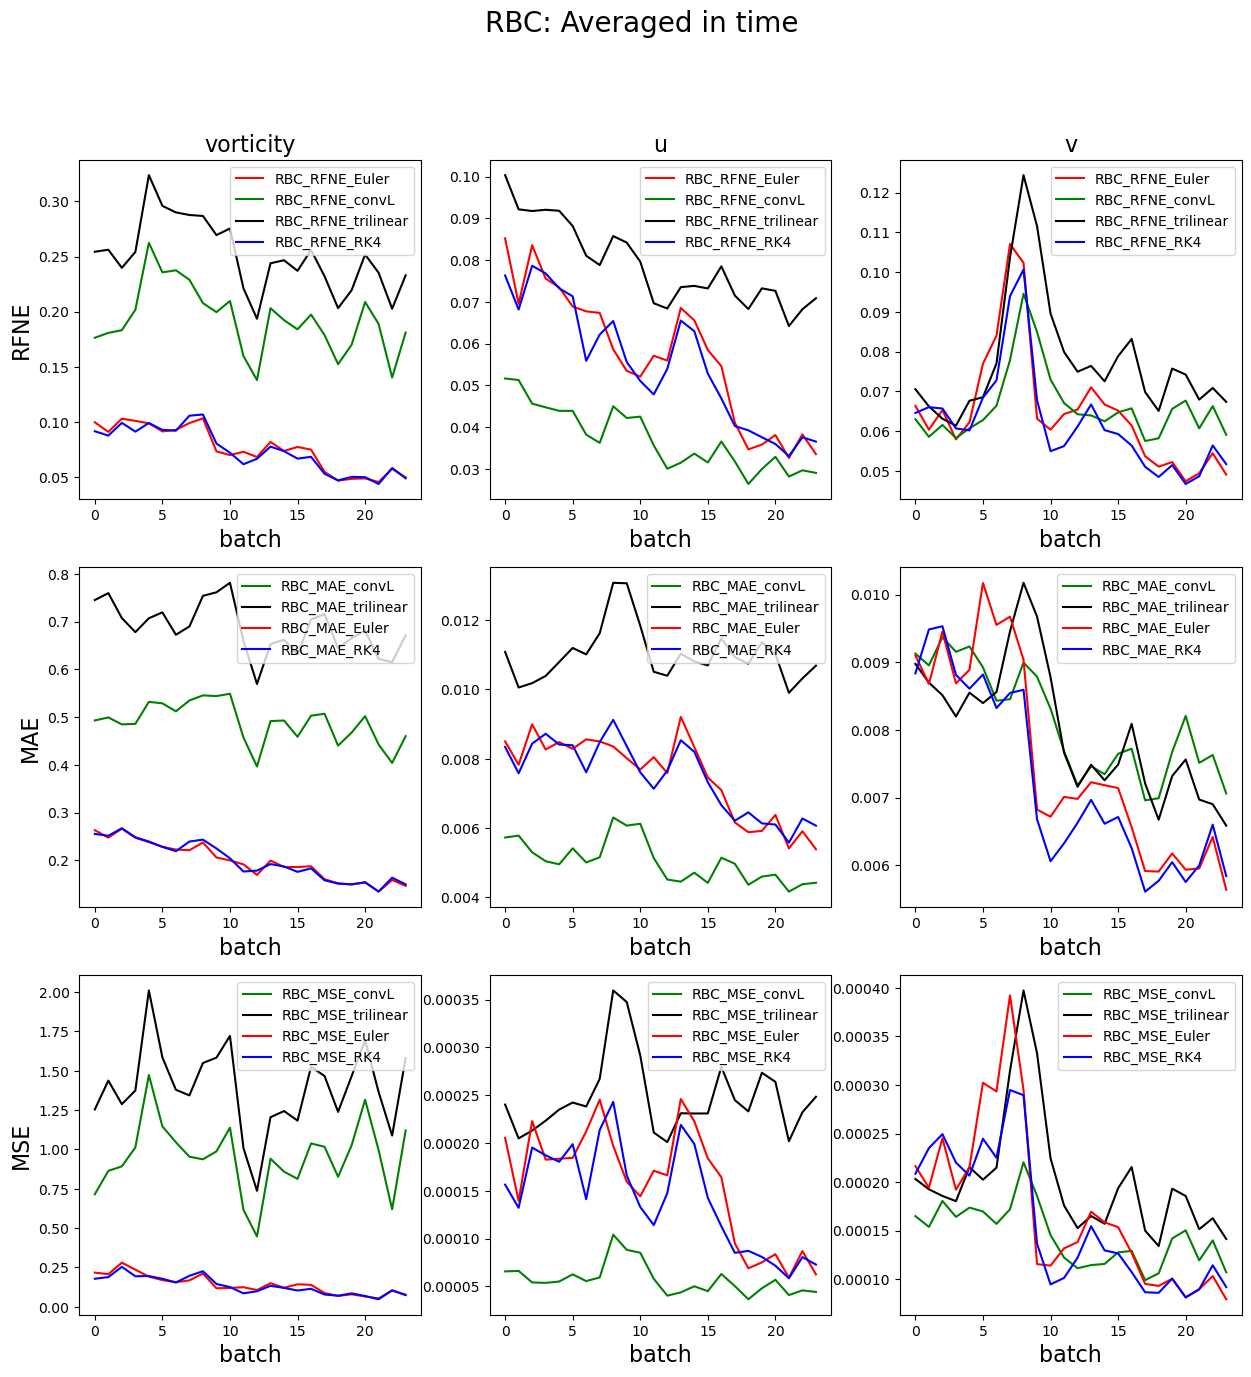

In [132]:
RBC_RFNE_Euler = np.load("test_results/RBC_RFNE_Euler.npy")
RBC_MSE_Euler = np.load("test_results/RBC_MSE_Euler.npy")
RBC_MAE_Euler = np.load("test_results/RBC_MAE_Euler.npy")
RBC_RFNE_RK4 = np.load("test_results/RBC_RFNE_RK4.npy")
RBC_MSE_RK4 = np.load("test_results/RBC_MSE_RK4.npy")
RBC_MAE_RK4 = np.load("test_results/RBC_MAE_RK4.npy")
RBC_RFNE_convL = np.load("test_results/RBC_RFNE_convL.npy")
RBC_MSE_convL = np.load("test_results/RBC_MSE_convL.npy")
RBC_MAE_convL = np.load("test_results/RBC_MAE_convL.npy")
RBC_RFNE_trilinear = np.load("test_results/RBC_RFNE_trilinear.npy")
RBC_MSE_trilinear = np.load("test_results/RBC_MSE_trilinear.npy")
RBC_MAE_trilinear = np.load("test_results/RBC_MAE_trilinear.npy")
print(RBC_RFNE_Euler.shape)
print(RBC_MAE_RK4.shape)
print(RBC_RFNE_convL.shape)

RBC_RFNE = {"Euler": RBC_RFNE_Euler, "RK4": RBC_RFNE_RK4, "convL": RBC_RFNE_convL.transpose(0,2,1), "trilinear": RBC_RFNE_trilinear.transpose(0,2,1)}
RBC_MSE = {"Euler": RBC_MSE_Euler, "RK4": RBC_MSE_RK4, "convL": RBC_MSE_convL.transpose(0,2,1), "trilinear": RBC_MSE_trilinear.transpose(0,2,1)}
RBC_MAE = {"Euler": RBC_MAE_Euler, "RK4": RBC_MAE_RK4, "convL": RBC_MAE_convL.transpose(0,2,1), "trilinear": RBC_MAE_trilinear.transpose(0,2,1)}
fig, ax = plt.subplots(3,3,figsize=(15,15))
col_name = ["vorticity",'u','v']
row_name = ["RFNE","MAE","MSE"]
for i in range (3):
    ax[0,i].plot(RBC_RFNE_Euler[...,i].mean(axis=1), label="RBC_RFNE_Euler",color = 'r')
    ax[0,i].plot(RBC_RFNE_convL[:,i,:].mean(axis=1), label="RBC_RFNE_convL",color = 'g')
    ax[0,i].plot(RBC_RFNE_trilinear[:,i,:].mean(axis=1), label="RBC_RFNE_trilinear",color = 'k')
    ax[0,i].plot(RBC_RFNE_RK4[...,i].mean(axis=1), label="RBC_RFNE_RK4",color = 'b')
    ax[0,i].legend()
    ax[0,i].set_xlabel("batch",fontsize=16)
    ax[0,i].set_title(col_name[i],fontsize=16)
    ax[0,0].set_ylabel("RFNE",fontsize=16)
    ax[1,i].plot(RBC_MAE_convL[:,i,:].mean(axis=1), label="RBC_MAE_convL",color = 'g')
    ax[1,i].plot(RBC_MAE_trilinear[:,i,:].mean(axis=1), label="RBC_MAE_trilinear",color = 'k')
    ax[1,i].plot(RBC_MAE_Euler[...,i].mean(axis=1), label="RBC_MAE_Euler",color = 'r')
    ax[1,i].plot(RBC_MAE_RK4[...,i].mean(axis=1), label="RBC_MAE_RK4",color = 'b')
    ax[1,0].set_ylabel("MAE",fontsize=16)
    ax[1,i].set_xlabel("batch",fontsize=16)
    ax[1,i].legend()
    ax[2,i].plot(RBC_MSE_convL[:,i,:].mean(axis=1), label="RBC_MSE_convL",color = 'g')
    ax[2,i].plot(RBC_MSE_trilinear[:,i,:].mean(axis=1), label="RBC_MSE_trilinear",color = 'k')
    ax[2,i].plot(RBC_MSE_Euler[...,i].mean(axis=1), label="RBC_MSE_Euler",color = 'r')
    ax[2,i].plot(RBC_MSE_RK4[...,i].mean(axis=1), label="RBC_MSE_RK4",color = 'b')
    ax[2,0].set_ylabel("MSE",fontsize=16)
    ax[2,i].set_xlabel("batch",fontsize=16)
    ax[2,i].legend()
fig.suptitle("RBC: Averaged in time",fontsize=20)
for name in method:
    print(f"RBC RFNE channel wise mean ({name}): [{format_means(RBC_RFNE[name])}]")
for name in method:
    print(f"RBC MAE channel wise mean ({name}): [{format_means(RBC_MAE[name])}]")
for name in method:
    print(f"RBC RFNE mean ({name}): {format_scalar(RBC_RFNE[name])[0]} +/- {format_scalar(RBC_RFNE[name])[1]}")
for name in method:
    print(f"RBC MAE mean ({name}): {format_scalar(RBC_MAE[name])[0]} +/- {format_scalar(RBC_MAE[name])[1]}")

Text(0.5, 0.98, 'DT: Averaged in batch (Error propogation for each time step)')

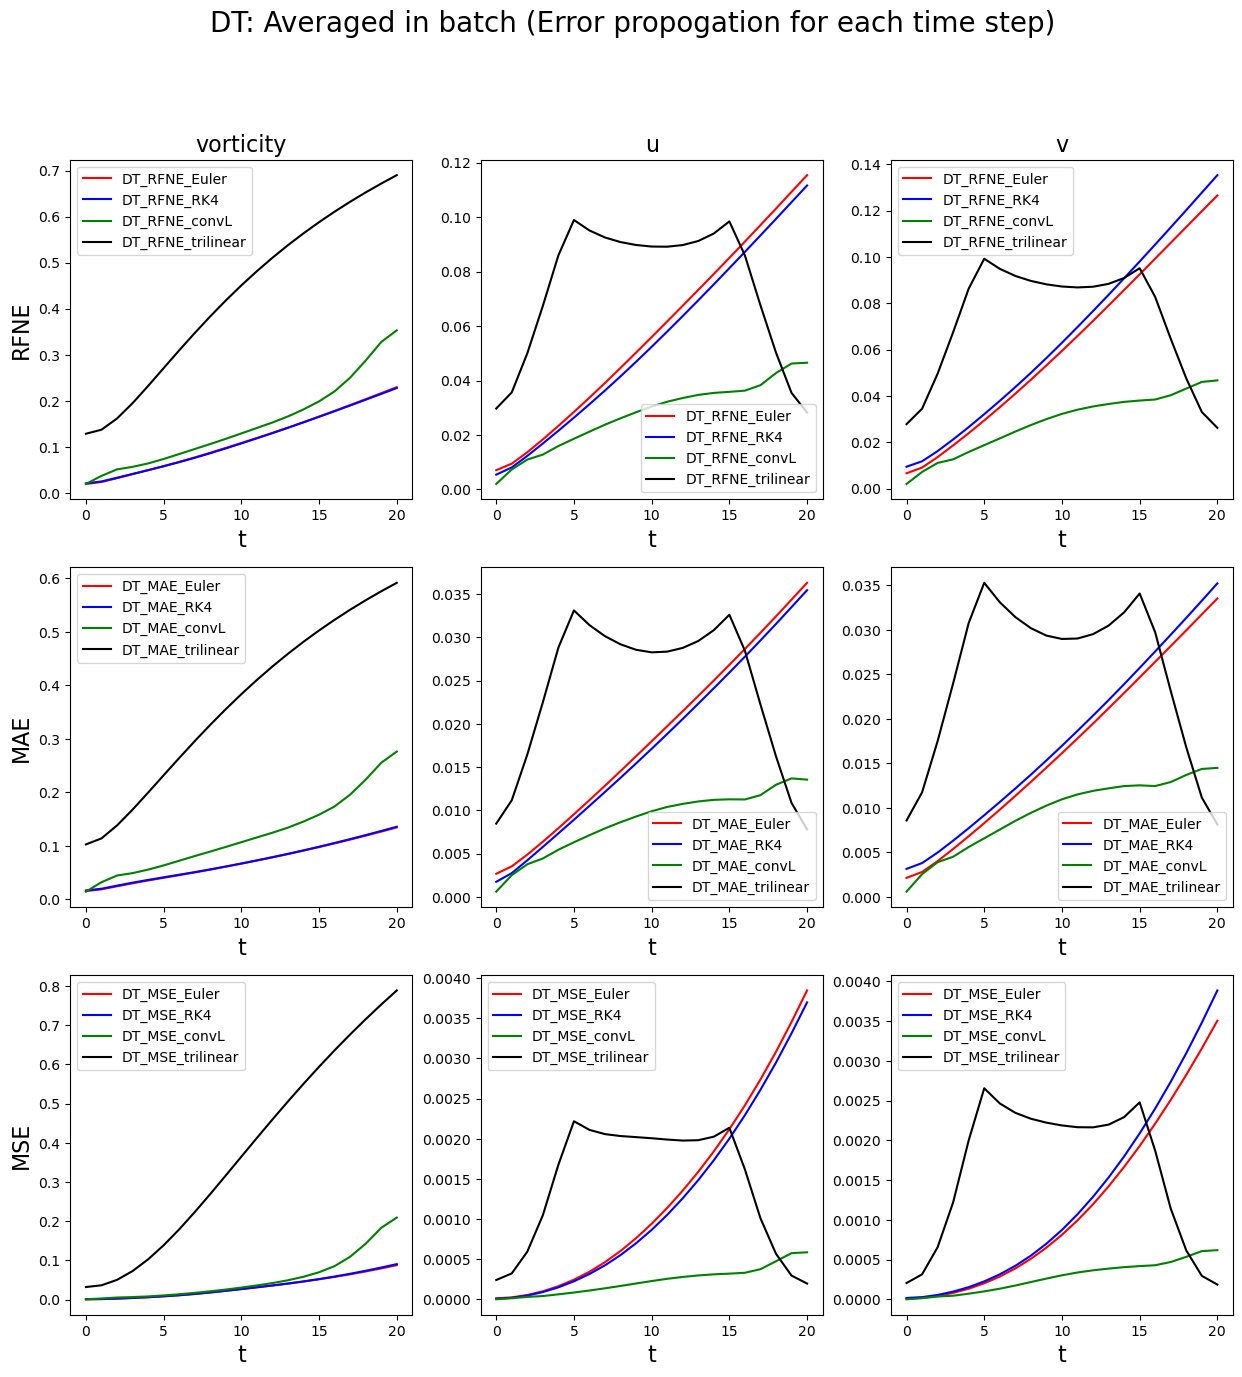

In [113]:
# in terms of error propogation inside a batch 
fig, ax = plt.subplots(3,3,figsize=(15,15))
method = ['Euler','RK4','convL','trilinear']
color= ['r','b','g','k']
col_name = ["vorticity",'u','v']
for i in range(3):
    for idx,(name,col) in enumerate (zip(method,color)):
        ax[0,i].plot(DT_RFNE[name][:,:,i].mean(axis=0), label="DT_RFNE_"+name,color = col )
        ax[0,i].set_title(col_name[i],fontsize=16)
        ax[0,i].set_xlabel("t",fontsize=16)
        ax[0,0].set_ylabel("RFNE",fontsize=16)
        ax[0,i].legend()
        ax[1,i].plot(DT_MAE[name][:,:,i].mean(axis=0), label="DT_MAE_"+name,color = col )
        ax[1,0].set_ylabel("MAE",fontsize=16)
        ax[1,i].set_xlabel("t",fontsize=16)
        ax[1,i].legend()
        ax[2,i].plot(DT_MSE[name][:,:,i].mean(axis=0), label="DT_MSE_"+name,color = col )
        ax[2,0].set_ylabel("MSE",fontsize=16)
        ax[2,i].set_xlabel("t",fontsize=16)
        ax[2,i].legend()
fig.suptitle("DT: Averaged in batch (Error propogation for each time step)",fontsize=20)


In [114]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
method = ['Euler','RK4','convL','trilinear']
color= ['r','b','g','k']
col_name = ["vorticity",'u','v']
for i in range(3):
    for idx,(name,col) in enumerate (zip(method,color)):
        ax[0,i].plot(RBC_RFNE[name][:,:,i].mean(axis=0), label="RBC_RFNE_"+name,color = col )
        ax[0,i].set_title(col_name[i],fontsize=16)
        ax[0,i].set_xlabel("t",fontsize=16)
        ax[0,0].set_ylabel("RFNE",fontsize=16)
        ax[0,i].legend()
        ax[1,i].plot(RBC_MAE[name][:,:,i].mean(axis=0), label="RBC_MAE_"+name,color = col )
        ax[1,0].set_ylabel("MAE",fontsize=16)
        ax[1,i].set_xlabel("t",fontsize=16)
        ax[1,i].legend()
        ax[2,i].plot(RBC_MSE[name][:,:,i].mean(axis=0), label="RBC_MSE_"+name,color = col )
        ax[2,0].set_ylabel("MSE",fontsize=16)
        ax[2,i].set_xlabel("t",fontsize=16)
        ax[2,i].legend()
fig.suptitle("RBC: Averaged in batch (Error propogation for each time step)",fontsize=20)

in terms of super-resolution
